In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from torchvision import datasets

In [17]:
test_data = datasets.MNIST("../../LIF/LIF_MNIST/data", train=False, download=False)
test_image, _ = test_data[0]
# Extract the first image from the MNIST dataset for testing

time_steps = 20

alpha_F = 0.9
alpha_L = 0.9
alpha_theta = 0.9
# Set decay coefficients

V_F = 1.0
V_L = 1.0
V_theta = 20.0
# Set coupling strength and threshold increment

beta = 0.2
# Set the weight of the coupling module's influence on the membrane potential

S = np.array(test_image).astype(np.float32)
image_H, image_W = S.shape

F = np.zeros((image_H, image_W), dtype=np.float32)
L = np.zeros((image_H, image_W), dtype=np.float32)
Y = np.zeros((image_H, image_W), dtype=np.float32)
V_th = np.ones((image_H, image_W), dtype=np.float32)
# Initialize values

W_kernel = np.ones((3, 3))
W_kernel /= np.sum(W_kernel)
# Calculate the neighborhood coupling effect using mean kernel

time_spikes = []

In [18]:
for n in range(1, time_steps):

    neighbor_effect = convolve2d(Y, W_kernel, mode='same', boundary = 'symm')
    # Use convolution operation to compute the coupling effect of the neighborhood

    F = np.exp(-alpha_F) * F + S + V_F * neighbor_effect
    # Input module

    L = np.exp(-alpha_L) + V_L * neighbor_effect
    # Coupling module

    V = F * (1 + beta * L)
    # Membrane potential

    V_th = np.exp(-alpha_theta) * V_th + V_theta * Y
    # Dynamic threshold

    Y = (V > V_th).astype(np.float32)
    # Record pulse output

    time_spikes.append(Y.copy())
    # Store a copy in the pulse record to prevent it from being updated to the last state

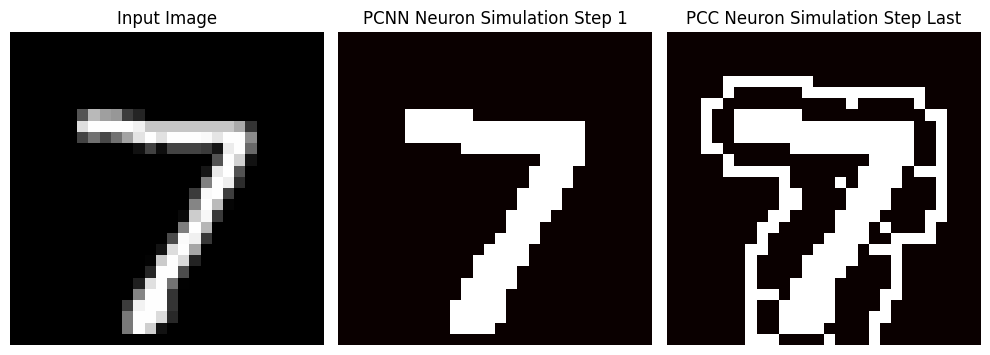

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(test_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("PCNN Neuron Simulation Step 1")
plt.imshow(time_spikes[0], cmap="hot")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title(f"PCNN Neuron Simulation Step Last")
plt.imshow(time_spikes[18], cmap = "hot")
plt.axis("off")

plt.tight_layout()
plt.show()